## An example of how to use bilby to perform parameter estimation for hyper params

In [1]:
import bilby
import numpy as np
import matplotlib.pyplot as plt
from bilby.core.likelihood import GaussianLikelihood
from bilby.core.prior import Uniform
from bilby.core.sampler import run_sampler
from bilby.core.result import make_pp_plot
from bilby.hyper.likelihood import HyperparameterLikelihood

### Setting up the working directory and labels

In [2]:
outdir = 'outdir'
label = 'hyper_parameter'
bilby.core.utils.setup_logger(outdir=outdir, label=label)

### Model:

In [3]:
# Define a model to fit to each data set
def model(x, c0, c1):
    return c0 + c1 * x

### Number of events:

In [4]:
N = 10
x = np.linspace(0, 10, N)
sigma = 1
Nevents = 4
labels = ['a', 'b', 'c', 'd']

### True hyper parameters:

In [5]:
true_mu_c0 = 5
true_sigma_c0 = 1

### Generating data and estimating posteriors for $c_0$ for different events:

In [6]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

# Make the sample sets
results = list()
for i in range(Nevents):
    c0 = np.random.normal(true_mu_c0, true_sigma_c0)
    c1 = np.random.uniform(-1, 1)
    injection_parameters = dict(c0=c0, c1=c1)

    data = model(x, **injection_parameters) + np.random.normal(0, sigma, N)
    line = ax1.plot(x, data, '-x', label=labels[i])

    likelihood = GaussianLikelihood(x, data, model, sigma)
    priors = dict(c0=Uniform(-10, 10, 'c0'), c1=Uniform(-10, 10, 'c1'))

    result = run_sampler(
        likelihood=likelihood, priors=priors, sampler='dynesty', nlive=1000,
        outdir=outdir, verbose=False, label='individual_{}'.format(i),
        save=False, injection_parameters=injection_parameters)
    ax2.hist(result.posterior.c0, color=line[0].get_color(), density=True,
             alpha=0.5, label=labels[i])
    results.append(result)
    
#plotting
ax1.set_xlabel('x')
ax1.set_ylabel('y(x)')
ax1.legend()
fig1.savefig('outdir/hyper_parameter_data.png')
ax2.set_xlabel('c0')
ax2.set_ylabel('density')
ax2.legend()
fig2.savefig('outdir/hyper_parameter_combined_posteriors.png')

12:15 bilby INFO    : Running for label 'individual_0', output will be saved to 'outdir'
12:15 bilby INFO    : Search parameters:
12:15 bilby INFO    :   c0 = Uniform(minimum=-10, maximum=10, name='c0', latex_label='c0', unit=None, boundary=None)
12:15 bilby INFO    :   c1 = Uniform(minimum=-10, maximum=10, name='c1', latex_label='c1', unit=None, boundary=None)
12:15 bilby INFO    : Single likelihood evaluation took 1.723e-04 s


12:15 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 1800, 'nlive': 1000, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 600, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7fd4620bddd0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': False, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
12:15 bilby INFO    : Checkpoint every check_point_delta_t = 600s
12:15 bilby INFO    : Using dynesty version 1.0.1
12:15 bilby INFO    : Using the bilby-implemented rwalk s

12:15 bilby INFO    : Sampling time: 0:01:36.889020
12:15 bilby INFO    : Summary of results:
nsamples: 10850
ln_noise_evidence:    nan
ln_evidence: -22.474 +/-  0.114
ln_bayes_factor:    nan +/-  0.114

12:15 bilby INFO    : Running for label 'individual_1', output will be saved to 'outdir'
12:15 bilby INFO    : Search parameters:
12:15 bilby INFO    :   c0 = Uniform(minimum=-10, maximum=10, name='c0', latex_label='c0', unit=None, boundary=None)
12:15 bilby INFO    :   c1 = Uniform(minimum=-10, maximum=10, name='c1', latex_label='c1', unit=None, boundary=None)
12:15 bilby INFO    : Single likelihood evaluation took 6.729e-05 s


12:15 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 1800, 'nlive': 1000, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 600, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7fd4607684d0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': False, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
12:15 bilby INFO    : Checkpoint every check_point_delta_t = 600s
12:15 bilby INFO    : Using dynesty version 1.0.1
12:15 bilby INFO    : Using the bilby-implemented rwalk s

12:15 bilby INFO    : Sampling time: 0:01:26.702411
12:15 bilby INFO    : Summary of results:
nsamples: 10965
ln_noise_evidence:    nan
ln_evidence: -20.252 +/-  0.115
ln_bayes_factor:    nan +/-  0.115

12:15 bilby INFO    : Running for label 'individual_2', output will be saved to 'outdir'
12:15 bilby INFO    : Search parameters:
12:15 bilby INFO    :   c0 = Uniform(minimum=-10, maximum=10, name='c0', latex_label='c0', unit=None, boundary=None)
12:15 bilby INFO    :   c1 = Uniform(minimum=-10, maximum=10, name='c1', latex_label='c1', unit=None, boundary=None)
12:15 bilby INFO    : Single likelihood evaluation took 9.115e-05 s


12:15 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 1800, 'nlive': 1000, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 600, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7fd460f49e10>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': False, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
12:15 bilby INFO    : Checkpoint every check_point_delta_t = 600s
12:15 bilby INFO    : Using dynesty version 1.0.1
12:15 bilby INFO    : Using the bilby-implemented rwalk s

12:15 bilby INFO    : Sampling time: 0:01:27.386391
12:15 bilby INFO    : Summary of results:
nsamples: 10965
ln_noise_evidence:    nan
ln_evidence: -19.317 +/-  0.115
ln_bayes_factor:    nan +/-  0.115

12:15 bilby INFO    : Running for label 'individual_3', output will be saved to 'outdir'
12:15 bilby INFO    : Search parameters:
12:15 bilby INFO    :   c0 = Uniform(minimum=-10, maximum=10, name='c0', latex_label='c0', unit=None, boundary=None)
12:15 bilby INFO    :   c1 = Uniform(minimum=-10, maximum=10, name='c1', latex_label='c1', unit=None, boundary=None)
12:15 bilby INFO    : Single likelihood evaluation took 1.440e-04 s


12:15 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 1800, 'nlive': 1000, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 600, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7fd46052dd10>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': False, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
12:15 bilby INFO    : Checkpoint every check_point_delta_t = 600s
12:15 bilby INFO    : Using dynesty version 1.0.1
12:15 bilby INFO    : Using the bilby-implemented rwalk s

12:15 bilby INFO    : Sampling time: 0:01:27.506440
12:15 bilby INFO    : Summary of results:
nsamples: 10931
ln_noise_evidence:    nan
ln_evidence: -20.394 +/-  0.115
ln_bayes_factor:    nan +/-  0.115



### Defining the population prior function for hyper parameters $\mu_{c_{0}}$ and $\sigma_{c_{0}}$:

In [12]:
def hyper_prior(dataset, mu, sigma):
    return np.exp(- (dataset['c0'] - mu)**2 / (2 * sigma**2)) /\
        (2 * np.pi * sigma**2)**0.5


def run_prior(dataset):
    return 1 / 20

### Collecting samples and evidences for posteriors of $c_0$ for all events:

In [13]:
samples = [result.posterior for result in results]
evidences = [result.log_evidence for result in results]

### Hyper likelihood:

In [15]:
hp_likelihood = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior,
    sampling_prior=run_prior, log_evidences=evidences, max_samples=500)

### Hyper priors

In [17]:
hp_priors = dict(mu=Uniform(-10, 10, 'mu', '$\mu_{c0}$'),
                 sigma=Uniform(0.0, 10, 'sigma', '$\sigma_{c0}$'))

### Running sampler for hyper parameter estimation:

In [ ]:
result = run_sampler(
    likelihood=hp_likelihood, priors=hp_priors, sampler='dynesty', nlive=1000,
    outdir=outdir, label=label)

12:16 bilby INFO    : Running for label 'hyper_parameter', output will be saved to 'outdir'
12:16 bilby INFO    : Search parameters:
12:16 bilby INFO    :   mu = Uniform(minimum=-10, maximum=10, name='mu', latex_label='$\\mu_{c0}$', unit=None, boundary=None)
12:16 bilby INFO    :   sigma = Uniform(minimum=0.0, maximum=10, name='sigma', latex_label='$\\sigma_{c0}$', unit=None, boundary=None)
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
12:16 bilby INFO    : Single likelihood evaluation took 2.759e-04 s


12:16 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 1800, 'nlive': 1000, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 600, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7fd459602250>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
12:16 bilby INFO    : Checkpoint every check_point_delta_t = 600s
12:16 bilby INFO    : Using dynesty version 1.0.1
12:16 bilby INFO    : Using the bilby-implemented rwalk sa

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
13:31 bilby INFO    : Run interrupted by signal 2: checkpoint and exit on 130
13:31 bilby INFO    : Written checkpoint file outdir/hyper_parameter_resume.pickle


### Plotting

18:22 bilby INFO    : Key: KS-test p-value
18:22 bilby INFO    : c0: 0.6031574028835703
18:22 bilby INFO    : c1: 0.13094968529635678
18:22 bilby INFO    : Combined p-value: 0.27948382434985136


(<Figure size 432x288 with 1 Axes>,
 pvals(combined_pvalue=0.27948382434985136, pvalues=[0.6031574028835703, 0.13094968529635678], names=['c0', 'c1']))

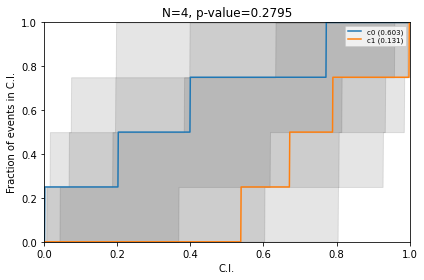

In [13]:
result.plot_corner(truth=dict(mu=true_mu_c0, sigma=true_sigma_c0))
make_pp_plot(results, filename=outdir + '/hyper_parameter_pp.png')

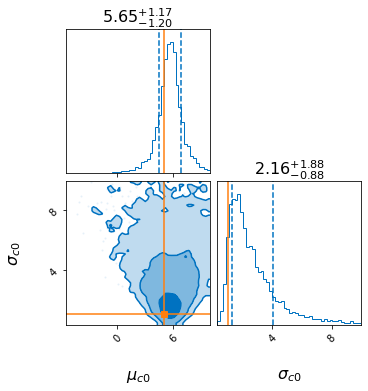

In [14]:
result.plot_corner(truth=dict(mu=true_mu_c0, sigma=true_sigma_c0))